In [ ]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=5e944f3a9f366f13ae0f4cfc1ef7b1581291376fa686f010726a98073d0c4e8f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [12]:
# matplotlibのインポートの実施
import matplotlib.pyplot as plt
# pandasのインポートの実施
import pandas as pd
# 日本語表示のインポート
import japanize_matplotlib

# csvファイルをデータフレームとして取り込む
df = pd.read_csv("sample_pandas_6.csv")
df.head()

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


In [15]:
# カテゴリーcsvファイルをとりこむ
category_df = pd.read_csv('sample_data/category.csv')
category_df

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [16]:
# meageメゾットを使い内部結合を行う。
df = pd.merge(df, category_df[['商品番号','カテゴリー']], how='inner', on='商品番号')
df


,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
2,2021-12-11,YY4HAAZR,商品サンプル YY4HAAZR,780,50,36,弁当
3,2016-09-15,YY4HAAZR,商品サンプル YY4HAAZR,780,5,54,弁当
4,2024-01-18,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
...,...,...,...,...,...,...,...
195,2019-04-29,2HSTCDWM,商品サンプル 2HSTCDWM,300,10,48,デザート
196,2022-11-10,2HSTCDWM,商品サンプル 2HSTCDWM,300,35,42,デザート
197,2015-02-08,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,0,デザート
198,2019-03-30,2HSTCDWM,商品サンプル 2HSTCDWM,300,40,24,デザート


In [17]:
#  データフレームの１列分のユニークな出現頻度をカウントするメゾットを追加
df['カテゴリー'].value_counts()

弁当       49
菓子類      38
飲料水      36
デザート     30
雑貨       27
図書・新聞    20
Name: カテゴリー, dtype: int64

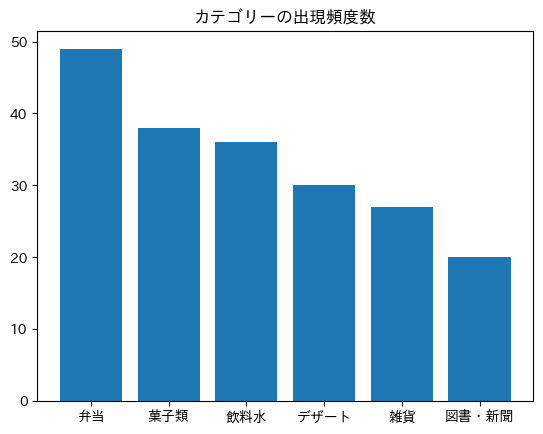

In [18]:
# numpyのインポートの実施
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([49, 38, 36, 30, 27, 20])
label = ["弁当", "菓子類", "飲料水", "デザート", "雑貨","図書・新聞"]
plt.title("カテゴリーの出現頻度数")
plt.bar(x, y, tick_label=label)
plt.show()

In [19]:
# データフレームを基準毎に要素をグループにまとめサブ列を集計する

df.groupby('商品番号')['単価'].max()


商品番号
1QJFO8QY    600
2HSTCDWM    300
48XMJXKO    330
8T7D5DQA    120
MESUDVWQ    660
QRMOGNUU    420
S6RE8W6X    720
X0ZE2ZMY     90
YY4HAAZR    780
Z4WOOIYV     90
Name: 単価, dtype: int64

In [21]:
df.groupby('商品番号')['注文数'].describe()

,count,mean,std,min,25%,50%,75%,max
商品番号,,,,,,,,
1QJFO8QY,32.0,35.250000,18.461818,0.0,24.0,36.0,49.5,60.0
2HSTCDWM,20.0,29.400000,21.137146,0.0,12.0,27.0,48.0,60.0
48XMJXKO,10.0,21.600000,13.326665,0.0,13.5,21.0,30.0,42.0
8T7D5DQA,21.0,25.142857,18.260027,0.0,12.0,36.0,42.0,54.0
MESUDVWQ,17.0,43.764706,18.219253,0.0,42.0,48.0,54.0,60.0
QRMOGNUU,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
S6RE8W6X,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
X0ZE2ZMY,14.0,21.857143,21.901377,0.0,1.5,15.0,39.0,60.0
YY4HAAZR,17.0,31.764706,18.095336,0.0,18.0,30.0,42.0,60.0
